In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# File paths
sales_file = "C:/Users/Ganes/OneDrive/salestable.csv"
sku_file = "C:/Users/Ganes/OneDrive/Desktop/SQL/squdetail.csv"

Sales Data Columns: Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_orderded',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')
SKU Data Columns: Index(['id', 'sku_name', 'cogs', 'base_price', 'category'], dtype='object')


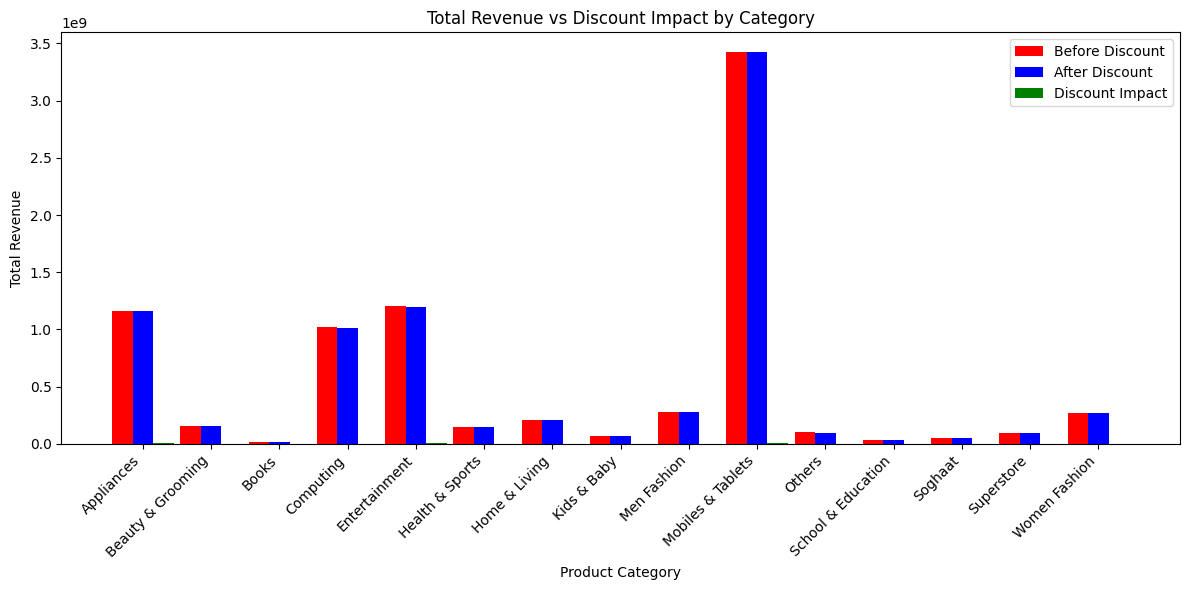

In [9]:
# Load the data
sales_df = pd.read_csv(sales_file)
sku_df = pd.read_csv(sku_file)

# Ensure column names are correct
print("Sales Data Columns:", sales_df.columns)
print("SKU Data Columns:", sku_df.columns)

# Merge sales data with SKU details on 'sku_id' (sales_df) and 'id' (sku_df)
merged_df = sales_df.merge(sku_df, left_on='sku_id', right_on='id', how='left')

# Aggregate total revenue before and after discount by category
category_revenue = merged_df.groupby('category').agg({
    'before_discount': 'sum',
    'after_discount': 'sum'
}).reset_index()

# Ensure columns exist before calculating discount impact
if 'before_discount' in category_revenue.columns and 'after_discount' in category_revenue.columns:
    category_revenue['discount_impact'] = category_revenue['before_discount'] - category_revenue['after_discount']
else:
    print("Error: Columns missing in category_revenue")
    print("Available Columns:", category_revenue.columns)

# Bar chart parameters
bar_width = 0.3
x = np.arange(len(category_revenue['category']))

# Plot bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width, category_revenue['before_discount'], width=bar_width, label='Before Discount', color='red')
ax.bar(x, category_revenue['after_discount'], width=bar_width, label='After Discount', color='blue')
ax.bar(x + bar_width, category_revenue.get('discount_impact', 0), width=bar_width, label='Discount Impact', color='green')

# Labels and Titles
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Revenue')
ax.set_title('Total Revenue vs Discount Impact by Category')
ax.set_xticks(x)
ax.set_xticklabels(category_revenue['category'], rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
